##  Imports

In [42]:
import pandas as pd
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [43]:
base = 'https://api.coingecko.com/api/v3/'

url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

result = requests.get(url)
j_bc = result.json()

df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2020-03-08 15:02:56.391,8611.711647
2020-03-08 16:05:33.211,8395.577860
2020-03-08 17:02:52.401,8348.131799
2020-03-08 18:05:39.270,8350.322705
2020-03-08 19:04:16.049,8302.136340
2020-03-08 20:02:50.200,8323.456668
2020-03-08 21:05:34.132,8292.962991
2020-03-08 22:04:09.782,8224.685957
2020-03-08 23:02:43.835,8223.540581


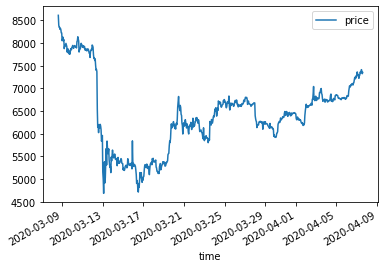

In [44]:
df_bc.plot()

# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [45]:
base = 'https://api.coingecko.com/api/v3/'

url = base + 'coins/litecoin/market_chart?vs_currency=usd&days=30'

result = requests.get(url)
j_lc = result.json()

df_lc = pd.DataFrame(j_lc['prices'], columns=['time', 'price'])
df_lc['time'] = pd.to_datetime(df_lc['time'], unit='ms')
df_lc.set_index('time', inplace=True)
df_lc.head(10)

,price
time,
2020-03-08 15:03:58.308,56.704186
2020-03-08 16:05:45.043,53.762934
2020-03-08 17:04:02.314,52.845111
2020-03-08 18:04:10.010,54.228646
2020-03-08 19:04:23.854,53.781091
2020-03-08 20:04:24.401,53.537096
2020-03-08 21:03:13.496,53.186279
2020-03-08 22:07:19.301,52.340470
2020-03-08 23:04:46.973,52.160226


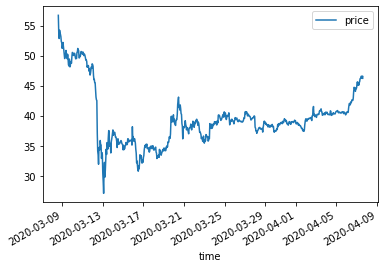

In [46]:
df_lc.plot()

## Plot Litecoin and Dogecoin prices in a lineplot for each

In [47]:
#doge coin

url = base + 'coins/dogecoin/market_chart'
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}
result = requests.get(url, params=param_dict)
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')
df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2020-03-08 15:07:46.582,0.002340
2020-03-08 16:05:21.533,0.002266
2020-03-08 17:05:55.571,0.002242
2020-03-08 18:07:44.422,0.002248
2020-03-08 19:07:24.668,0.002237
2020-03-08 20:07:33.250,0.002236
2020-03-08 21:07:35.091,0.002236
2020-03-08 22:05:42.097,0.002233
2020-03-08 23:07:37.570,0.002206


Text(0.5, 1.0, 'Dogecoin')

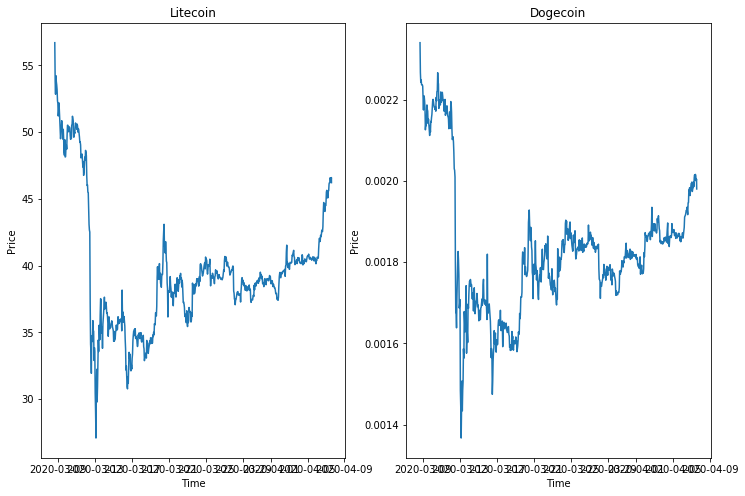

In [48]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
axes[0].plot(df_lc)
axes[1].plot(df_dc)

axes[0].set_xlabel("Time")
axes[0].set_ylabel("Price")
axes[0].set_title("Litecoin")

axes[1].set_xlabel("Time")
axes[1].set_ylabel("Price")
axes[1].set_title("Dogecoin")

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [49]:
url = base + 'coins/list'
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,02-token,o2t,O2 Token
2,0cash,zch,0cash
3,0chain,zcn,0chain
4,0x,zrx,0x
5,0xcert,zxc,0xcert
6,0xdark,oxd,0xDark
7,0xeth-cash,0xech,0xETH Cash
8,0xeth-classic,0xetc,0xETH Classic
9,0xethereum-token,0xeth,0xEthereum Token


In [50]:
data_df = df_list.iloc[:10, 0]
data_df

0              01coin
1            02-token
2               0cash
3              0chain
4                  0x
5              0xcert
6              0xdark
7          0xeth-cash
8       0xeth-classic
9    0xethereum-token
Name: id, dtype: object

In [39]:
# url = "http://api.coingecko.com/api/v3/coins/01coin/market_chart?vs_currency=usd&days=300"
# result = requests.get(url)
# data = result.json()
# data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
# data_df["file_name"] = "01coin"
# lst = []
# lst.append(data_df)
# lst

In [51]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_report = pd.concat(data_list)
data_report

,date_time,price,file_name
0,1560384000000,3.477176e-03,01coin
1,1560470400000,3.394577e-03,01coin
2,1560556800000,3.896259e-03,01coin
3,1560643200000,3.512342e-03,01coin
4,1560729600000,3.379261e-03,01coin
...,...,...,...
11,1584489600000,8.489999e-13,0xethereum-token
12,1584576000000,8.397907e-13,0xethereum-token
13,1585008000000,8.397907e-13,0xethereum-token
14,1585440000000,8.397907e-13,0xethereum-token


## Make a csv called 'top_ten_report.csv' and check that it worked

In [54]:
data_report.to_csv("top_ten_reports.csv", index=False)